In [36]:
import h5py
import pandas as pd

import matplotlib.pyplot as plt

# Function for reading h5py generated data file into pandas

In [32]:
def load_braid_objects_to_pandas(filename):
    try:
        data = h5py.File(filename, 'r', swmr=True)['data']
    except:
        data = h5py.File(filename, 'r', swmr=False)['data']
        
    attributes = {    'frame_number': int, 
                            'reconstruction_stamp_secs': int,
                            'reconstruction_stamp_nsecs': int,
                            'acquire_stamp_secs': int,
                            'acquire_stamp_nsecs': int, 
                            'obj_id': int,
                            'position_x': float, 
                            'position_y': float, 
                            'position_z': float, 
                            'velocity_x': float,
                            'velocity_y': float,
                            'velocity_z': float,
                            'posvel_covariance_d1': float,
                            'posvel_covariance_d2': float,
                            'posvel_covariance_d3': float,
                            'posvel_covariance_d4': float,
                            'posvel_covariance_d5': float,
                            'posvel_covariance_d6': float,
                        }
    
    d = {}
    for attribute, typ in attributes.items():
        d.setdefault(attribute, data[attribute].flat)
    df = pd.DataFrame(d, index=None)
    df = df[df.frame_number!=0] # new pandas doesn't work with above line

    return df

# Example loading and plotting a trajectory

In [34]:
filename = '20240530_110841_braid_objects.hdf5'
df = load_braid_objects_to_pandas(filename)

In [35]:
df

,frame_number,reconstruction_stamp_secs,reconstruction_stamp_nsecs,acquire_stamp_secs,acquire_stamp_nsecs,obj_id,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,posvel_covariance_d1,posvel_covariance_d2,posvel_covariance_d3,posvel_covariance_d4,posvel_covariance_d5,posvel_covariance_d6
1,342809,1717092526,908331632,1717092526,892292976,28,0.410863,0.111300,0.223616,0.072869,-0.052956,0.125824,7.376757e-07,6.264720e-07,0.000002,0.021375,0.019183,0.050616
3,342810,1717092526,917853116,1717092526,902288675,28,0.413241,0.110992,0.224123,0.203312,-0.036874,0.071685,6.447453e-07,5.501223e-07,0.000002,0.015226,0.014449,0.023963
5,342811,1717092526,928350687,1717092526,912284374,28,0.415386,0.110506,0.223595,0.216958,-0.050533,-0.007177,6.168467e-07,5.310254e-07,0.000002,0.015099,0.014380,0.021545
7,342812,1717092526,937428712,1717092526,922280073,28,0.416072,0.109632,0.222211,0.102587,-0.085225,-0.086331,6.138357e-07,5.297575e-07,0.000002,0.015024,0.014311,0.021508
9,342813,1717092526,947982549,1717092526,932275772,28,0.416133,0.108723,0.220646,0.027695,-0.092192,-0.127992,6.149590e-07,5.305848e-07,0.000002,0.015011,0.014304,0.021492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,345276,1717092551,578363895,1717092551,551043987,33,0.405696,0.011586,0.267081,0.331784,0.075189,0.100079,4.562348e-04,4.467945e-04,0.000500,0.176363,0.175155,0.181722
4089,345277,1717092551,578807592,1717092551,561039686,33,0.409014,0.012338,0.268082,0.331784,0.075189,0.100079,6.298934e-04,6.182062e-04,0.000683,0.196363,0.195155,0.201722
4091,345278,1717092551,587052822,1717092551,571035385,33,0.412332,0.013090,0.269083,0.331784,0.075189,0.100079,8.428248e-04,8.286490e-04,0.000908,0.216363,0.215155,0.221722
4093,345279,1717092551,597206115,1717092551,581031084,33,0.415650,0.013842,0.270084,0.331784,0.075189,0.100079,1.099029e-03,1.082123e-03,0.001176,0.236363,0.235155,0.241722


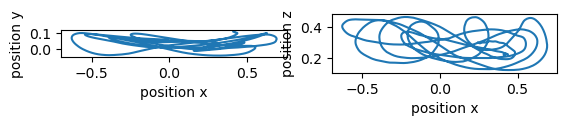

In [38]:
obj_ids = df.obj_id.unique()
obj_id = obj_ids[0]

trajec = df[df['obj_id']==obj_id]

fig = plt.figure()

ax_1 = fig.add_subplot(121)
ax_1.plot(trajec.position_x, trajec.position_y)
ax_1.set_xlabel('position x')
ax_1.set_ylabel('position y')
ax_1.set_aspect('equal')

ax_2 = fig.add_subplot(122)
ax_2.plot(trajec.position_x, trajec.position_z)
ax_2.set_xlabel('position x')
ax_2.set_ylabel('position z')
ax_2.set_aspect('equal')
